## ** Airbnb Data Analysis & Machine Learning**

##1. Data Loading and Initial Exploration with Pandas

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#algorithms to use
from sklearn.neighbors import KNeighborsRegressor

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import Hawaii listing datasets
listings_url = 'https://data.insideairbnb.com/united-states/hi/hawaii/2024-12-12/data/listings.csv.gz'

reviews_url = 'https://data.insideairbnb.com/united-states/hi/hawaii/2024-12-12/data/reviews.csv.gz'

# Load the datasets into DataFrames
listings_df = pd.read_csv(listings_url, compression='gzip')

reviews_df = pd.read_csv(reviews_url, compression='gzip')


In [ ]:
# Get last 5 reviews per listing (change head(5) to head(10) for 10 reviews)
latest_reviews = (reviews_df.sort_values(['listing_id', 'date'], ascending=[True, False])
                  .groupby('listing_id').head(5))

# Concatenate all reviews into one text per listing
review_texts = latest_reviews.groupby('listing_id')['comments'].apply(
    lambda x: " ".join(x.astype(str))  # Combine all reviews
).reset_index(name='combined_reviews')

In [ ]:
# Ex1 initial overview of data

listings_df.info()
review_texts.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35493 entries, 0 to 35492
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            35493 non-null  int64  
 1   listing_url                                   35493 non-null  object 
 2   scrape_id                                     35493 non-null  int64  
 3   last_scraped                                  35493 non-null  object 
 4   source                                        35493 non-null  object 
 5   name                                          35493 non-null  object 
 6   description                                   34239 non-null  object 
 7   neighborhood_overview                         17261 non-null  object 
 8   picture_url                                   35493 non-null  object 
 9   host_id                                       35493 non-null 

In [ ]:
#View the first few rows of listing data
listings_df.head()

id                                      listing_url  \
0  774605505067289333  https://www.airbnb.com/rooms/774605505067289333   
1            27165852            https://www.airbnb.com/rooms/27165852   
2  965172139286148452  https://www.airbnb.com/rooms/965172139286148452   
3  686768988137551849  https://www.airbnb.com/rooms/686768988137551849   
4  974058647912716646  https://www.airbnb.com/rooms/974058647912716646   

        scrape_id last_scraped       source  \
0  20241212152918   2024-12-13  city scrape   
1  20241212152918   2024-12-13  city scrape   
2  20241212152918   2024-12-13  city scrape   
3  20241212152918   2024-12-13  city scrape   
4  20241212152918   2024-12-13  city scrape   

                                       name  \
0               Wailea Ekolu Village | 1703   
1                           Kona Billfisher   
2      The Royal Sea Cliff with Ocean Views   
3  TRANQUIL 1-BEDROOM CONDO ON KONA ISLAND!   
4          Quintessential Magical Oceanview   

                                         description  \
0                1 Bedroom Ocean View Condo - SILVER   
1  - 3rd floor (no elevator) with a lot of privac...   
2  E Komo Mai to our Hale Pau Hana "house of no w...   
3  Nearby Pu‘uhonua o Hōnaunau, an ancient sanctu...   
4  Revel in the magical view from this East Side ...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Great Central East Side Island Location, 3 mil...   

                                         picture_url    host_id  ...  \
0  https://a0.muscache.com/pictures/prohost-api/H...  231330348  ...   
1  https://a0.muscache.com/pictures/78da3bbc-d8aa...  203776123  ...   
2  https://a0.muscache.com/pictures/miso/Hosting-...  108218643  ...   
3  https://a0.muscache.com/pictures/miso/Hosting-...   79733183  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...   65379678  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                         5.0                   5.00                5.00   
1                         4.5                   5.00                4.88   
2                         5.0                   5.00                4.82   
3                         5.0                   5.00                5.00   
4                         5.0                   4.96                4.80   

                                 license instant_bookable  \
0       210080770143, TA-186-035-4048-01                t   
1                                    NaN                f   
2  TA-040-758-3232-01 GE-040-758-3232-01                f   
3                                    NaN                f   
4       370030150166, TA-159-050-5472-00                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                            335                                         335   
1                              1                                           1   
2                              1                                           1   
3                              6                                           6   
4                             15                                           9   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            6   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.07  
1                                           0              0.11  
2                                           0              0.80  
3                              

In [ ]:
#View the first few rows of review data
review_texts.head()

listing_id                                   combined_reviews
0        5269  Had a comfortable stay once the gas to the sto...
1        5387  We were happy to stay in this little part of h...
2        7888  全般的には、とてもフレンドリーで親切な良いホストだったと思います。お家の前に着くとすぐに出迎...
3        7896  We thought this unit was okay. It is convenien...
4       13238  This is such a great place to stay on a trip t...

In [ ]:
listings_df.shape

(35493, 75)

In [ ]:
review_texts.shape

(27120, 2)

In [ ]:
#Find any nulls in the data
listings_df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               8373
Length: 75, dtype: int64

In [ ]:
#Find any nulls in the data
review_texts.isnull().sum()

listing_id          0
combined_reviews    0
dtype: int64

In [ ]:
listings_df.duplicated().sum()
review_texts.duplicated().sum()

np.int64(0)

##2. Data Selection and Cleaning

>


In [ ]:
#Ex2 Print unique locations
listings_df['host_location'].unique()



array(['Kihei, HI', nan, 'North Myrtle Beach, SC', ...,
       'Melbourne, Australia', 'Coto de Caza, CA', 'Casper, WY'],
      dtype=object)

Filters for Honolulu Hawaii

In [ ]:
listings_df.dropna(subset=['host_location'], inplace=True) # Drop rows with missing host location values
listings_df = listings_df[listings_df['host_location']=='Honolulu, HI'] #Filter for only listings in Honolulu

In [ ]:
listings_df['host_location'].unique()

array(['Honolulu, HI'], dtype=object)

In [ ]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4181 entries, 9 to 35449
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4181 non-null   int64  
 1   listing_url                                   4181 non-null   object 
 2   scrape_id                                     4181 non-null   int64  
 3   last_scraped                                  4181 non-null   object 
 4   source                                        4181 non-null   object 
 5   name                                          4181 non-null   object 
 6   description                                   4150 non-null   object 
 7   neighborhood_overview                         2258 non-null   object 
 8   picture_url                                   4181 non-null   object 
 9   host_id                                       4181 non-null   int64

**Select relevant columns**

In [ ]:
# Selecting only relevant columns for analysis

selected_columns = [
    'id', 'name', 'host_id', 'price', 'property_type', 'room_type', 'bedrooms', 'bathrooms', 'accommodates',
    'number_of_reviews', 'review_scores_rating', 'review_scores_value',
    'review_scores_location', 'instant_bookable', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'reviews_per_month', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
    "availability_30",'number_of_reviews_ltm','latitude','longitude'
]
listings_df = listings_df[selected_columns]

# Display the first few rows
listings_df.head()


id                                               name  \
9              42205873     Heart of Waikiki! Lower Floor! Sleeps 4! RBW32   
21             11572502                     Studio in Waikiki with kitchen   
47  1024030689175680516  SS35 Fully Renovated Suite 1 block 2 Waikiki B...   
51  1167699452059332261    Palms At Waikiki 1110-Studio 1BA City View - 2K   
52   937572111152182028                            Hawaiian Studio Getaway   

      host_id    price       property_type        room_type  bedrooms  \
9    69552498  $100.00        Entire condo  Entire home/apt       1.0   
21    4464014  $107.00  Room in aparthotel  Entire home/apt       0.0   
47    2349948  $138.00  Entire rental unit  Entire home/apt       0.0   
51  315047988  $216.00  Entire rental unit  Entire home/apt       0.0   
52   60673060  $143.00  Entire rental unit  Entire home/apt       1.0   

    bathrooms  accommodates  number_of_reviews  ...  review_scores_checkin  \
9         1.0             4                 23  ...                   4.87   
21        1.0             2                178  ...                   4.93   
47        1.0             2                 15  ...                   4.93   
51        1.0             4                  1  ...                   5.00   
52        1.0             2                  0  ...                    NaN   

    review_scores_communication  reviews_per_month host_response_rate  \
9                          4.96               0.53               100%   
21                         4.83               2.40               100%   
47                         4.87               1.22               100%   
51                         2.00               0.17               100%   
52                          NaN                NaN                NaN   

    host_acceptance_rate  host_is_superhost  availability_30  \
9                   100%                  t               16   
21                   99%                  f               16   
47                  100%                  f               15   
51                  100%                  f                6   
52                  100%                  f               27   

    number_of_reviews_ltm   latitude   longitude  
9                       6  21.280006 -157.830963  
21                     30  21.283680 -157.831250  
47                     14  21.276310 -157.824800  
51                      1  21.285730 -157.837070  
52                      0  21.312299 -158.008700  

[5 rows x 26 columns]

In [ ]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4181 entries, 9 to 35449
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4181 non-null   int64  
 1   name                         4181 non-null   object 
 2   host_id                      4181 non-null   int64  
 3   price                        3876 non-null   object 
 4   property_type                4181 non-null   object 
 5   room_type                    4181 non-null   object 
 6   bedrooms                     4102 non-null   float64
 7   bathrooms                    3875 non-null   float64
 8   accommodates                 4181 non-null   int64  
 9   number_of_reviews            4181 non-null   int64  
 10  review_scores_rating         3705 non-null   float64
 11  review_scores_value          3705 non-null   float64
 12  review_scores_location       3705 non-null   float64
 13  instant_bookable      

**Handling Missing Values**

*Choosing an Imputation Strategy*

There are different ways to fill missing values:

1. **Mean Imputation:** Uses the average value (good for normal distributions).
2. **Median Imputation:** Uses the middle value (better for skewed data).
3. **Mode Imputation:** Uses the most frequent value (best for categorical data).

In [ ]:
listings_df.isnull().sum() # Check for missing values in the selected columns. You can use this command before and after handling of the missing value to check for accuracy

id                               0
name                             0
host_id                          0
price                          305
property_type                    0
room_type                        0
bedrooms                        79
bathrooms                      306
accommodates                     0
number_of_reviews                0
review_scores_rating           476
review_scores_value            476
review_scores_location         476
instant_bookable                 0
review_scores_accuracy         476
review_scores_cleanliness      476
review_scores_checkin          476
review_scores_communication    476
reviews_per_month              476
host_response_rate             240
host_acceptance_rate           192
host_is_superhost              100
availability_30                  0
number_of_reviews_ltm            0
latitude                         0
longitude                        0
dtype: int64

In [ ]:
# Use median to full null values

listings_df['bedrooms'].fillna(0, inplace=True) # Fill missing bedrooms values with 0
listings_df['bathrooms'].fillna(listings_df['bathrooms'].median(), inplace=True) # Fill missing bathrooms values with the median
listings_df['review_scores_value'].fillna(listings_df['review_scores_value'].median(), inplace=True) # Fill missing review_scores_value values with the median
listings_df['review_scores_location'].fillna(listings_df['review_scores_location'].median(), inplace=True) # Fill missing review_scores_location values with the median
listings_df['review_scores_rating'].fillna(listings_df['review_scores_rating'].median(), inplace=True) # Fill missing review_scores_rating values with the median
listings_df['review_scores_accuracy'].fillna(listings_df['review_scores_accuracy'].median(), inplace=True) # Fill missing review_scores_accuracy values with the median
listings_df['review_scores_cleanliness'].fillna(listings_df['review_scores_cleanliness'].median(), inplace=True) # Fill missing review_scores_cleanliness values with the median
listings_df['review_scores_checkin'].fillna(listings_df['review_scores_checkin'].median(), inplace=True) # Fill missing review_scores_checkin values with the median
listings_df['review_scores_communication'].fillna(listings_df['review_scores_communication'].median(), inplace=True) # Fill missing review_scores_communication values with the median
listings_df['reviews_per_month'].fillna(listings_df['reviews_per_month'].median(), inplace=True) # Fill missing reviews_per_month values with the median
listings_df['host_is_superhost'].fillna(0, inplace=True) # Fill missing review score values with 0

In [ ]:
#For the 'price' column, removed dollar sign and commas, dropped missing values to avoid bias from extremes.
listings_df['price'] = listings_df['price'].replace({'\$': '', ',': ''}, regex=True)
listings_df['price'] = pd.to_numeric(listings_df['price'], errors='coerce')  # Convert to numeric (NaNs for errors)
listings_df = listings_df.dropna(subset=['price'])


In [ ]:
#For the 'host_response_rate' column, removed percent signs, filled missing values with median to avoid bias from extremes.
listings_df['host_response_rate'] = listings_df['host_response_rate'].replace({'%': ''}, regex=True)
listings_df['host_response_rate'] = pd.to_numeric(listings_df['host_response_rate'], errors='coerce')  # Convert to numeric (NaNs for errors)
listings_df['host_response_rate'] = listings_df['host_response_rate'].fillna(listings_df['host_response_rate'].median())


In [ ]:
#For the 'host_acceptance_rate' column, removed percent signs, filled missing values with median to avoid bias from extremes.
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].replace({'%': ''}, regex=True)
listings_df['host_acceptance_rate'] = pd.to_numeric(listings_df['host_acceptance_rate'], errors='coerce')  # Convert to numeric (NaNs for errors)
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].fillna(listings_df['host_acceptance_rate'].median())


In [ ]:
listings_df.isnull().sum() # Checking for missing values in the selected columns after handling them.

id                             0
name                           0
host_id                        0
price                          0
property_type                  0
room_type                      0
bedrooms                       0
bathrooms                      0
accommodates                   0
number_of_reviews              0
review_scores_rating           0
review_scores_value            0
review_scores_location         0
instant_bookable               0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
reviews_per_month              0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
availability_30                0
number_of_reviews_ltm          0
latitude                       0
longitude                      0
dtype: int64

Regarding 'bedrooms' column:
- The 79 listings with 0 bedrooms were kept as is since they likely represent shared or non-traditional accommodations (e.g., shared rooms or couch-surfing).
- Changing these values could significantly distort the dataset by introducing artificial bedroom counts for these types of listings.
- By leaving them as 0, we retain the integrity of these shared spaces and their impact on the overall analysis.

In [ ]:
#Drop rows with no reviews
review_texts = review_texts.dropna(subset=['combined_reviews'])

## Converting Categorical Variables to Numeric

The review dataset has no categorical variables, so this section will only require cleaning for the listing dataset.

In [ ]:
#Check for categorical variables
listings_df.head()

id                                               name  \
9              42205873     Heart of Waikiki! Lower Floor! Sleeps 4! RBW32   
21             11572502                     Studio in Waikiki with kitchen   
47  1024030689175680516  SS35 Fully Renovated Suite 1 block 2 Waikiki B...   
51  1167699452059332261    Palms At Waikiki 1110-Studio 1BA City View - 2K   
52   937572111152182028                            Hawaiian Studio Getaway   

      host_id  price       property_type        room_type  bedrooms  \
9    69552498  100.0        Entire condo  Entire home/apt       1.0   
21    4464014  107.0  Room in aparthotel  Entire home/apt       0.0   
47    2349948  138.0  Entire rental unit  Entire home/apt       0.0   
51  315047988  216.0  Entire rental unit  Entire home/apt       0.0   
52   60673060  143.0  Entire rental unit  Entire home/apt       1.0   

    bathrooms  accommodates  number_of_reviews  ...  review_scores_checkin  \
9         1.0             4                 23  ...                   4.87   
21        1.0             2                178  ...                   4.93   
47        1.0             2                 15  ...                   4.93   
51        1.0             4                  1  ...                   5.00   
52        1.0             2                  0  ...                   4.91   

    review_scores_communication  reviews_per_month host_response_rate  \
9                          4.96               0.53              100.0   
21                         4.83               2.40              100.0   
47                         4.87               1.22              100.0   
51                         2.00               0.17              100.0   
52                         4.92               1.14              100.0   

    host_acceptance_rate  host_is_superhost  availability_30  \
9                  100.0                  t               16   
21                  99.0                  f               16   
47                 100.0                  f               15   
51                 100.0                  f                6   
52                 100.0                  f               27   

    number_of_reviews_ltm   latitude   longitude  
9                       6  21.280006 -157.830963  
21                     30  21.283680 -157.831250  
47                     14  21.276310 -157.824800  
51                      1  21.285730 -157.837070  
52                      0  21.312299 -158.008700  

[5 rows x 26 columns]

In [ ]:
# Turn rest of categorical variables into binary
df_instantbookable={'t': 1, 'f':0}
df_superhost={'t': 1, 'f':0}

listings_df['instant_bookable'] = listings_df['instant_bookable'].map(df_instantbookable)
listings_df['host_is_superhost'] = listings_df['host_is_superhost'].map(df_superhost)


# Get dummies of categorical variables that aren't ordinal
cat_cols_dummies=['property_type', 'room_type']

listings_df=pd.get_dummies(data=listings_df, columns=cat_cols_dummies, drop_first=True)

listings_df.head()

id                                               name  \
9              42205873     Heart of Waikiki! Lower Floor! Sleeps 4! RBW32   
21             11572502                     Studio in Waikiki with kitchen   
47  1024030689175680516  SS35 Fully Renovated Suite 1 block 2 Waikiki B...   
51  1167699452059332261    Palms At Waikiki 1110-Studio 1BA City View - 2K   
52   937572111152182028                            Hawaiian Studio Getaway   

      host_id  price  bedrooms  bathrooms  accommodates  number_of_reviews  \
9    69552498  100.0       1.0        1.0             4                 23   
21    4464014  107.0       0.0        1.0             2                178   
47    2349948  138.0       0.0        1.0             2                 15   
51  315047988  216.0       0.0        1.0             4                  1   
52   60673060  143.0       1.0        1.0             2                  0   

    review_scores_rating  review_scores_value  ...  \
9                   4.87                 4.96  ...   
21                  4.80                 4.77  ...   
47                  4.87                 4.80  ...   
51                  1.00                 2.00  ...   
52                  4.80                 4.72  ...   

    property_type_Room in boutique hotel  property_type_Room in hotel  \
9                                  False                        False   
21                                 False                        False   
47                                 False                        False   
51                                 False                        False   
52                                 False                        False   

    property_type_Shared room in rental unit  property_type_Tent  \
9                                      False               False   
21                                     False               False   
47                                     False               False   
51                                     False               False   
52                                     False               False   

    property_type_Tiny home  property_type_Treehouse  property_type_Yurt  \
9                     False                    False               False   
21                    False                    False               False   
47                    False                    False               False   
51                    False                    False               False   
52                    False                    False               False   

    room_type_Hotel room  room_type_Private room  room_type_Shared room  
9                  False                   False                  False  
21                 False                   False                  False  
47                 False                   False                  False  
51                 False                   False                  False  
52                 False                   False                  False  

[5 rows x 61 columns]

##3. Exploratory Data Analysis

In [ ]:
#Summary statistics of numerical data
listings_df.describe()

id       host_id        price     bedrooms    bathrooms  \
count  3.876000e+03  3.876000e+03  3876.000000  3876.000000  3876.000000   
mean   4.826038e+17  1.450288e+08   195.799794     1.064499     1.265609   
std    5.012640e+17  1.496477e+08   185.485845     0.959284     0.698165   
min    1.352800e+04  2.977000e+04    27.000000     0.000000     0.000000   
25%    3.467661e+07  4.261293e+07   108.000000     0.000000     1.000000   
50%    5.526996e+17  7.407968e+07   151.000000     1.000000     1.000000   
75%    9.703565e+17  2.155865e+08   217.250000     1.000000     1.000000   
max    1.309129e+18  6.574784e+08  4900.000000    10.000000     8.500000   

       accommodates  number_of_reviews  review_scores_rating  \
count   3876.000000        3876.000000           3876.000000   
mean       3.855779          51.997936              4.737526   
std        1.962512          73.688148              0.316323   
min        1.000000           0.000000              1.000000   
25%        2.000000           4.000000              4.670000   
50%        4.000000          24.000000              4.800000   
75%        4.000000          70.000000              4.910000   
max       16.000000        1070.000000              5.000000   

       review_scores_value  review_scores_location  ...  \
count          3876.000000             3876.000000  ...   
mean              4.666014                4.854337  ...   
std               0.327997                0.246565  ...   
min               1.000000                1.000000  ...   
25%               4.590000                4.830000  ...   
50%               4.720000                4.910000  ...   
75%               4.830000                4.960000  ...   
max               5.000000                5.000000  ...   

       review_scores_checkin  review_scores_communication  reviews_per_month  \
count            3876.000000                  3876.000000        3876.000000   
mean                4.851416                     4.849518           1.426855   
std                 0.241561                     0.265538           1.155121   
min                 1.000000                     1.000000           0.010000   
25%                 4.820000                     4.820000           0.470000   
50%                 4.910000                     4.920000           1.140000   
75%                 4.980000                     4.990000           2.150000   
max                 5.000000                     5.000000          12.120000   

       host_response_rate  host_acceptance_rate  host_is_superhost  \
count         3876.000000           3876.000000        3777.000000   
mean            98.881579             95.017544           0.441356   
std              6.002809             15.212905           0.496615   
min              0.000000              0.000000           0.000000   
25%            100.000000             98.000000           0.000000   
50%            100.000000             99.000000           0.000000   
75%            100.000000            100.000000           1.000000   
max            100.000000            100.000000           1.000000   

       availability_30  number_of_reviews_ltm     latitude    longitude  
count      3876.000000            3876.000000  3876.000000  3876.000000  
mean          9.284572              12.731166    21.269252  -157.796527  
std           8.385350              14.196391     0.233943     0.347065  
min           0.000000               0.000000    19.086526  -159.482480  
25%           3.000000               1.000000    21.275770  -157.837820  
50%           7.000000               7.000000    21.281980  -157.826810  
75%          13.000000              22.000000    21.286871  -157.821718  
max          30.000000             106.000000    22.222752  -154.898060  

[8 rows x 23 columns]

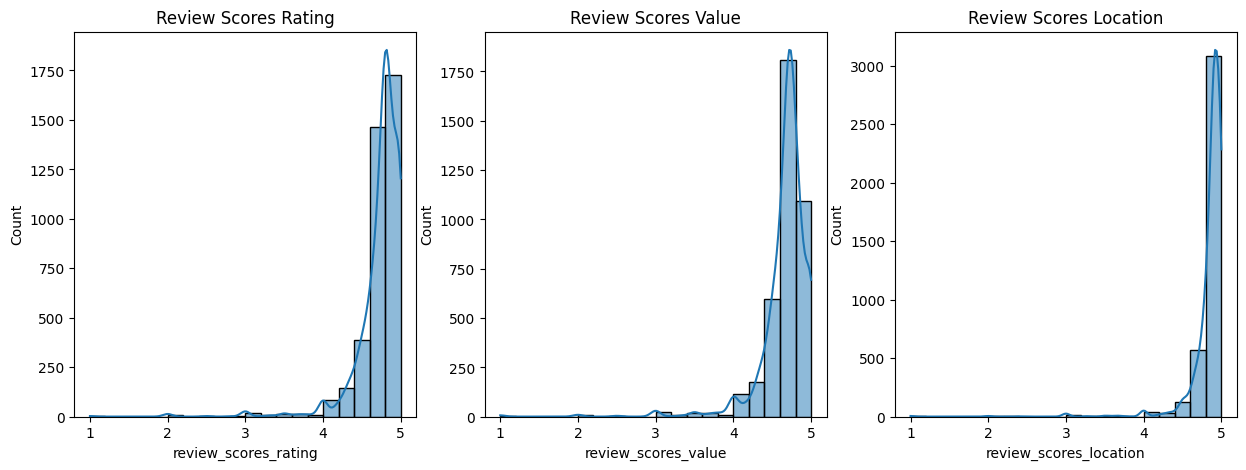

In [ ]:
# Some simple methods to handle missing values to check the disribution before that.
#Checking whether to use mean or median in reviewing scores
#If the data is skewed (not symmetrical, has outliers will use median
#If the data is normally distributed bell-shaped will use mean
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(listings_df['review_scores_rating'], bins=20, kde=True, ax=ax[0]).set(title='Review Scores Rating')
sns.histplot(listings_df['review_scores_value'], bins=20, kde=True, ax=ax[1]).set(title='Review Scores Value')
sns.histplot(listings_df['review_scores_location'], bins=20, kde=True, ax=ax[2]).set(title='Review Scores Location')
plt.show()

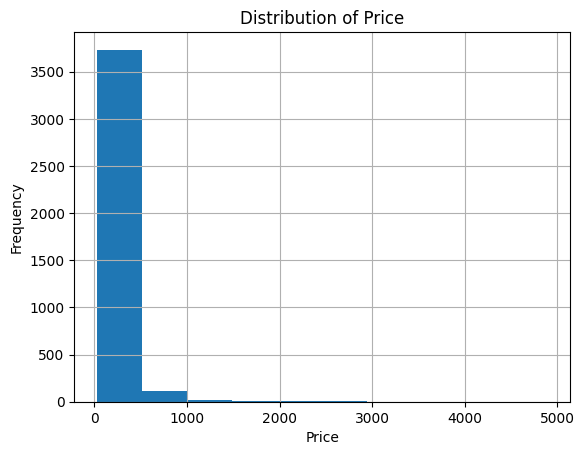

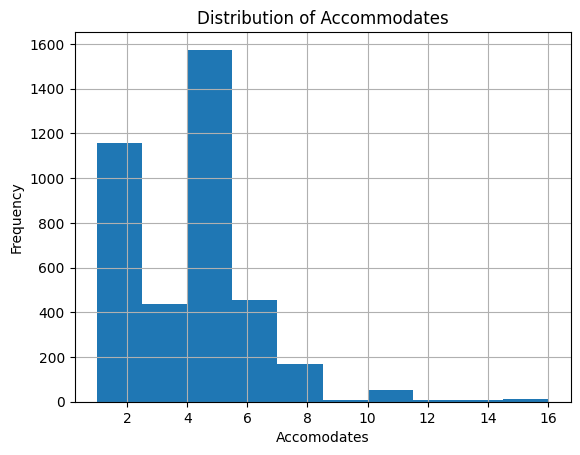

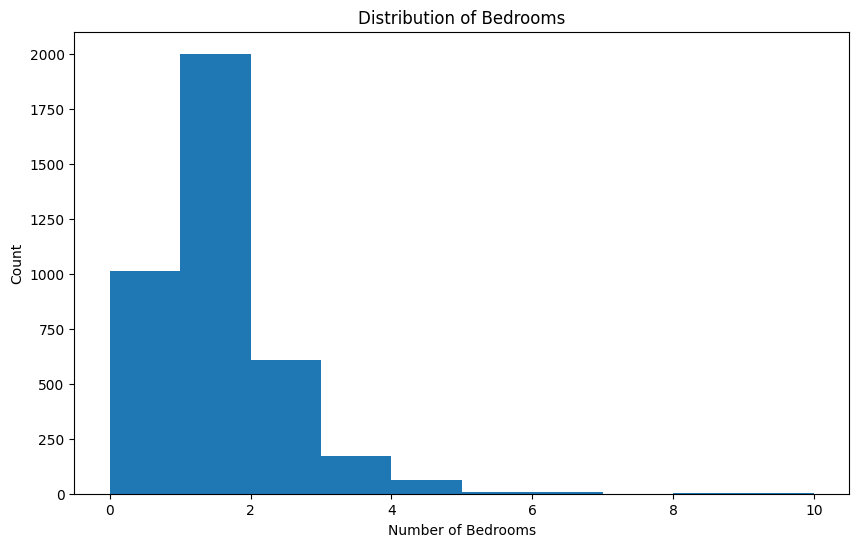

In [ ]:
# Descriptive statistics
listings_df.describe()

# Distribution of price
listings_df['price'].hist()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()
# Distribution of accomodates
listings_df['accommodates'].hist()
plt.xlabel('Accomodates')
plt.ylabel('Frequency')
plt.title('Distribution of Accommodates')
plt.show()
# Distribution of bedrooms
plt.figure(figsize=(10, 6))
listings_df['bedrooms'].plot.hist()
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()


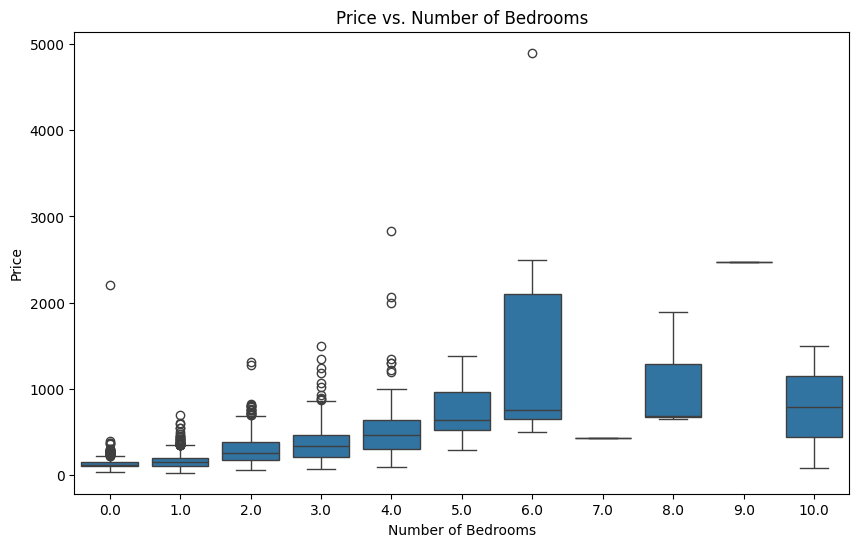

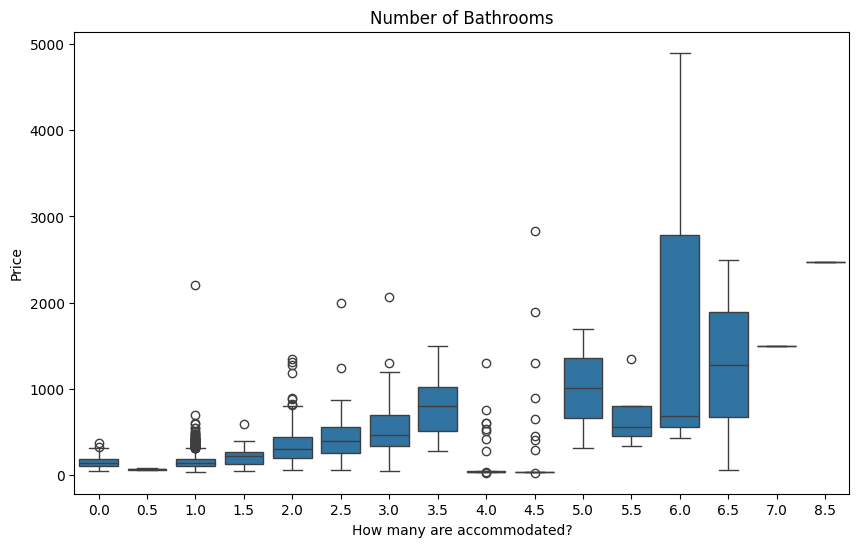

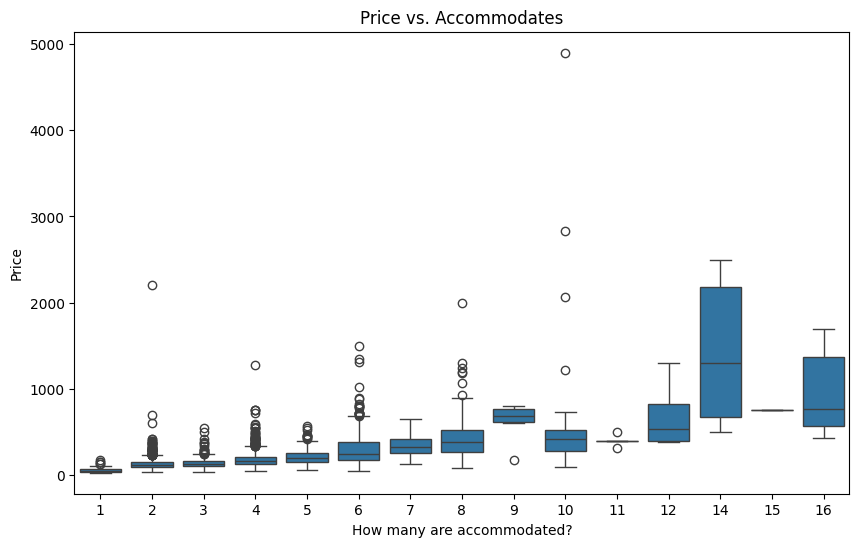

In [ ]:
# Generate bar plots comparing price and other variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=listings_df)
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='price', data=listings_df)
plt.title('Number of Bathrooms')
plt.xlabel('How many are accommodated?')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='accommodates', y='price', data=listings_df)
plt.title('Price vs. Accommodates')
plt.xlabel('How many are accommodated?')
plt.ylabel('Price')
plt.show()

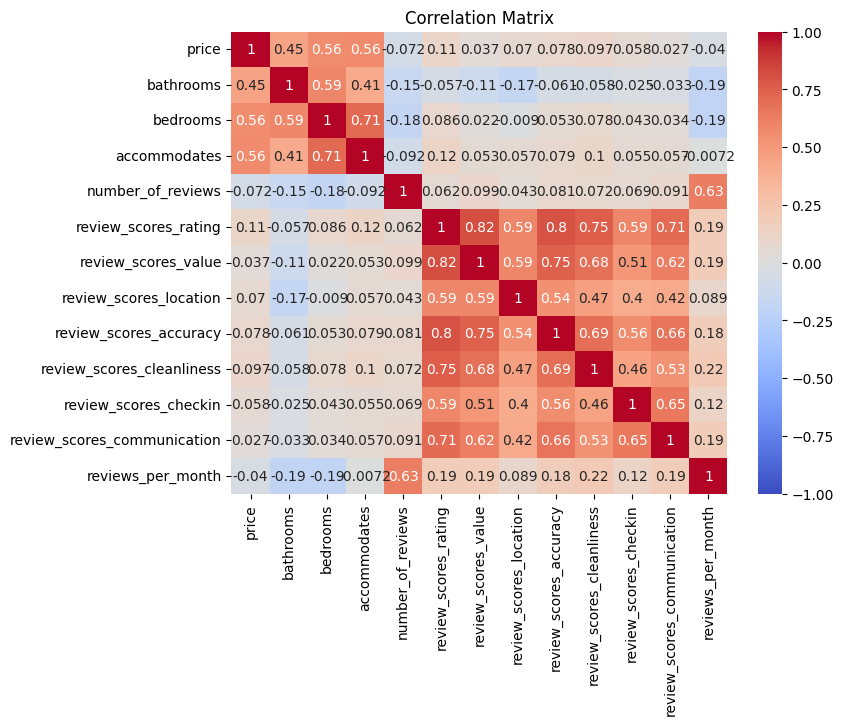

In [ ]:
# Correlation matrix
corr_matrix = listings_df[['price', 'bathrooms', 'bedrooms', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'review_scores_value', 'review_scores_location', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',	'review_scores_communication',	'reviews_per_month']].corr()


# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

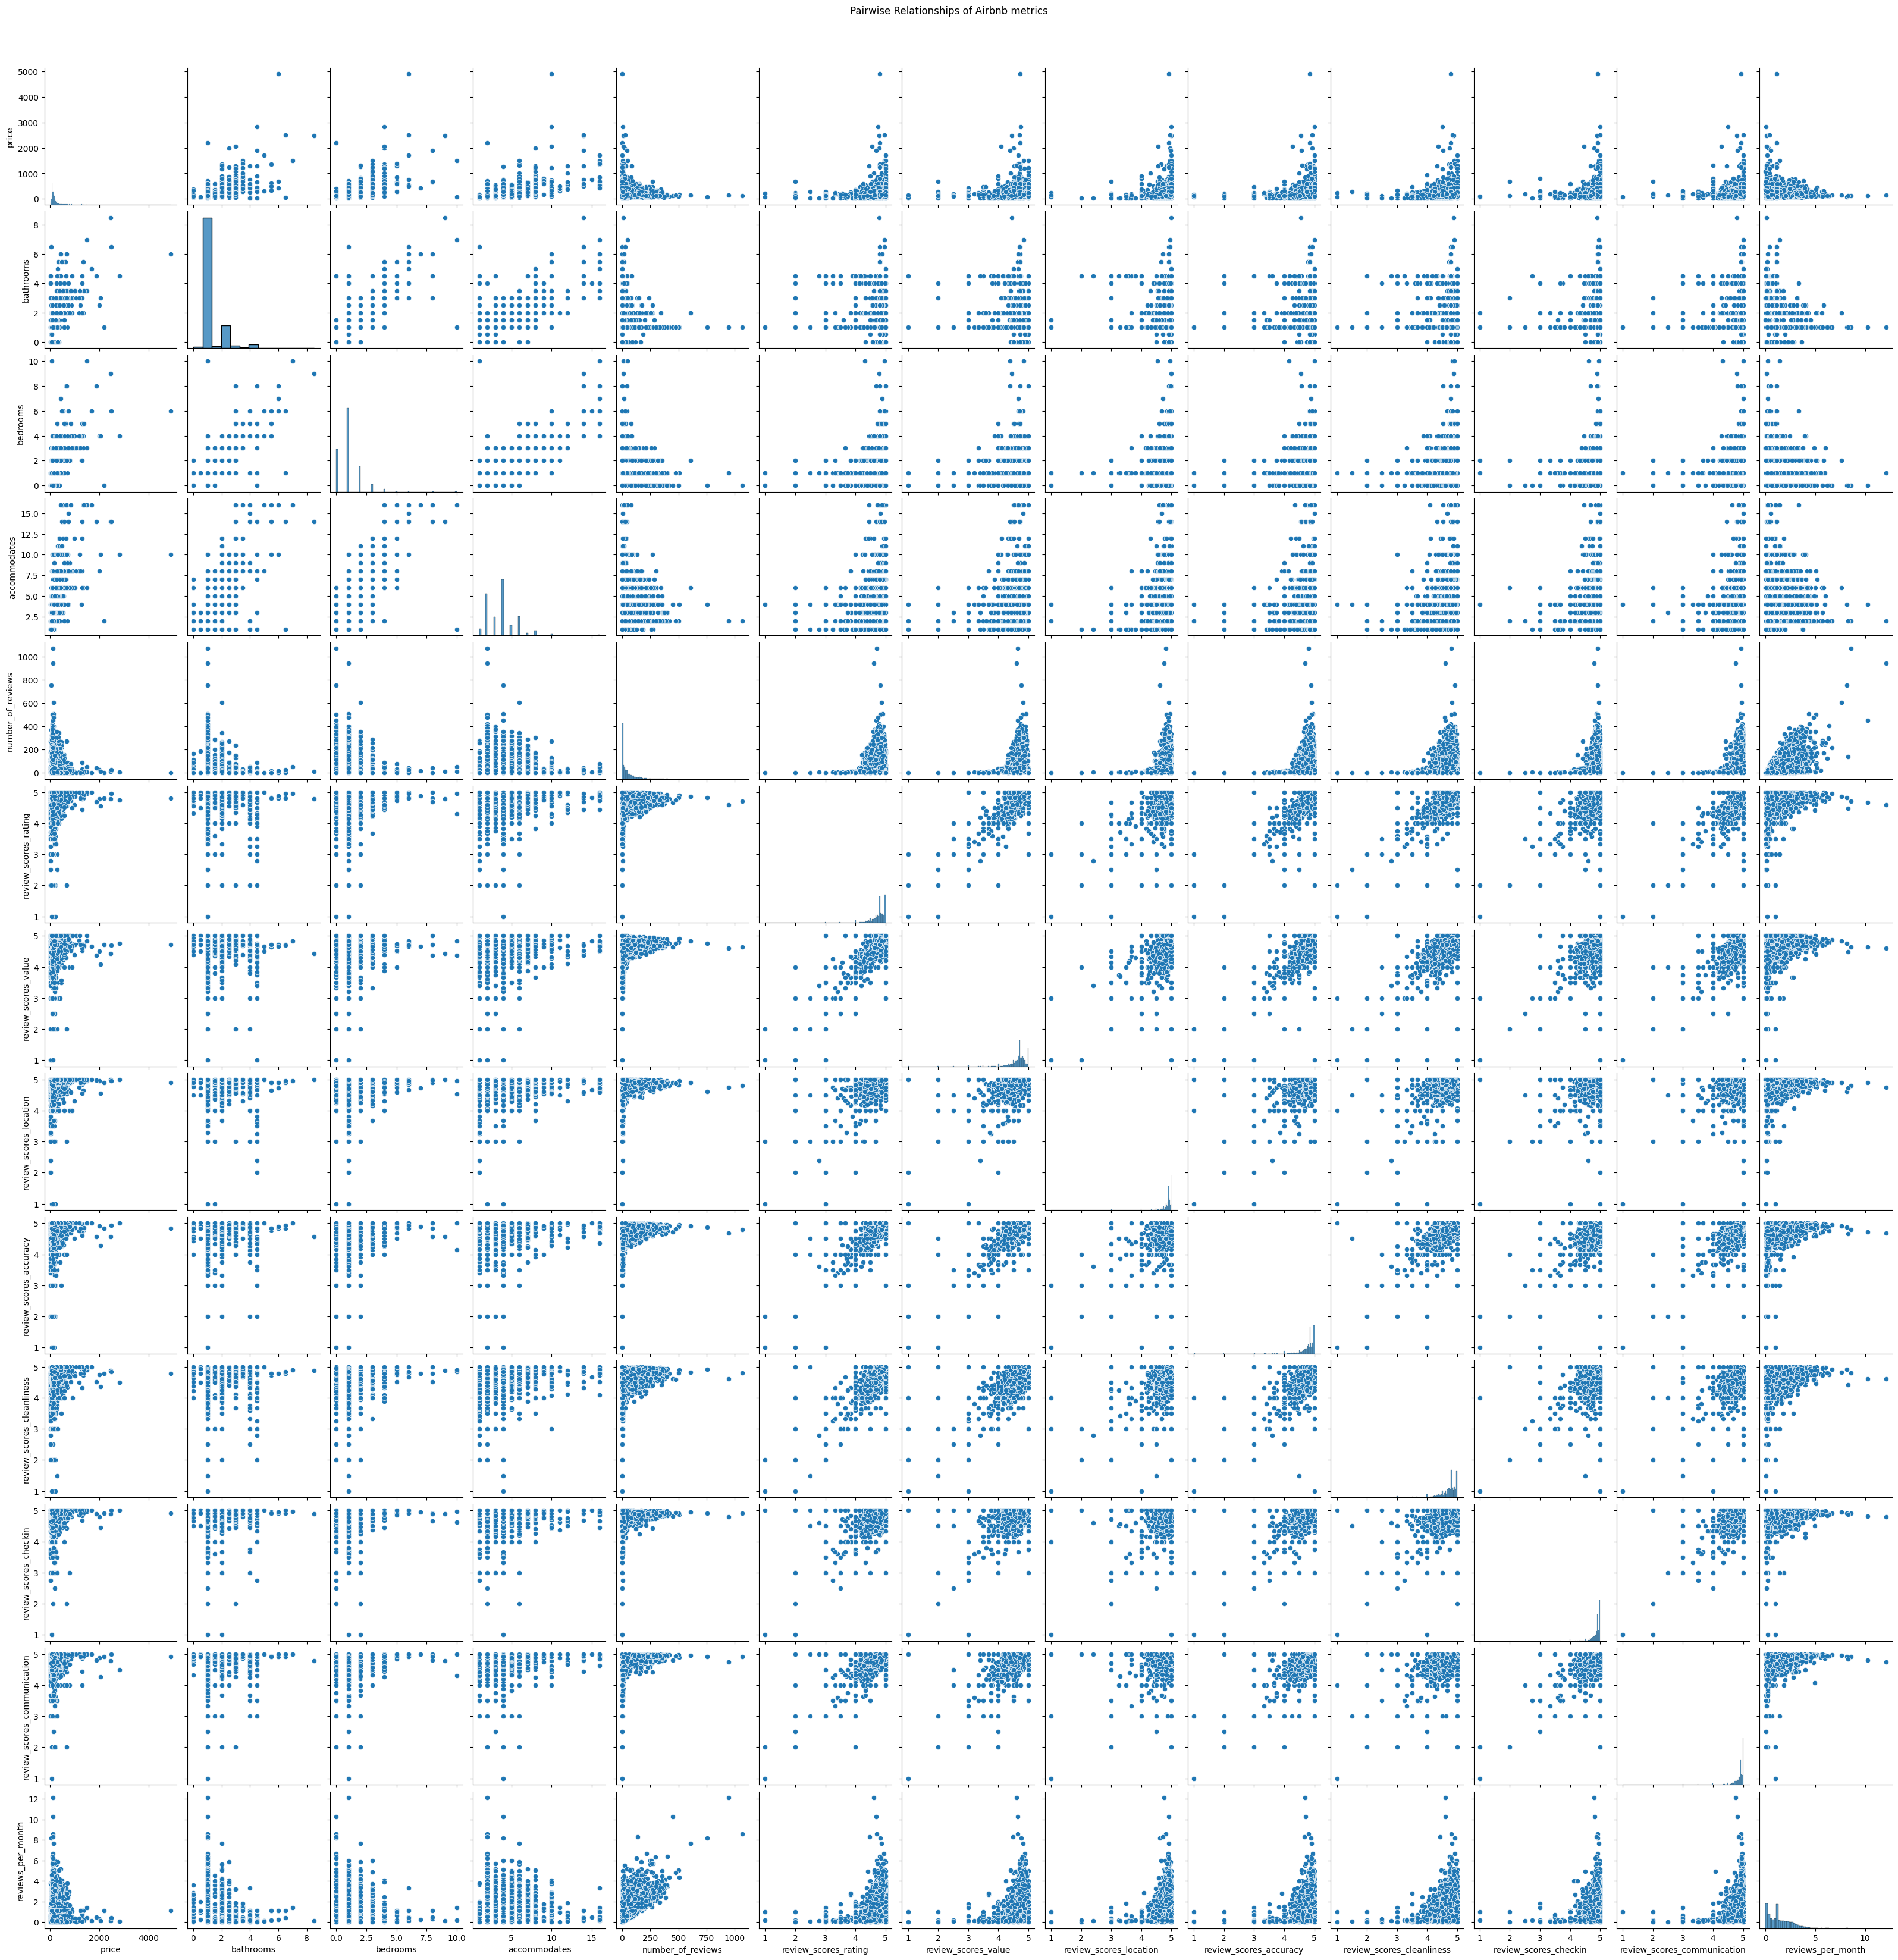

In [ ]:
#Pairwise plots of price, bedrooms, bathrooms, and accommodates
sns.pairplot(listings_df[['price', 'bathrooms', 'bedrooms', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'review_scores_value', 'review_scores_location', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',	'review_scores_communication',	'reviews_per_month']])
plt.suptitle('Pairwise Relationships of Airbnb metrics', y=1.02)
plt.show()

##4. Review - Data Preprocessing and NLP Models


## Merge Data Sets

In [ ]:
# Import libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD

In [ ]:
#Merge the datasets into one
combined_df = pd.merge(listings_df, review_texts, left_on='id', right_on='listing_id', how='inner')

In [ ]:
# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#check the shape of the dataframe
combined_df.shape

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):
        return ''
    # Remove URLs, non-letters, and convert to lowercase
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    # Tokenize and remove stopwords - word_tokenize() would be more accurate but slow
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    stop_words.update(['stay', 'great'])

    # Lemmatize and remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]

    return ' '.join(tokens)

In [ ]:
# pre-process comments
combined_df['cleaned_comments'] = combined_df['combined_reviews'].apply(preprocess_text)

combined_df.head()

id                                               name  \
0             42205873     Heart of Waikiki! Lower Floor! Sleeps 4! RBW32   
1             11572502                     Studio in Waikiki with kitchen   
2  1024030689175680516  SS35 Fully Renovated Suite 1 block 2 Waikiki B...   
3  1167699452059332261    Palms At Waikiki 1110-Studio 1BA City View - 2K   
4   835654868168725390                     The Aloha Shack! Free Parking!   

     host_id  price  bedrooms  bathrooms  accommodates  number_of_reviews  \
0   69552498  100.0       1.0        1.0             4                 23   
1    4464014  107.0       0.0        1.0             2                178   
2    2349948  138.0       0.0        1.0             2                 15   
3  315047988  216.0       0.0        1.0             4                  1   
4    1528780  125.0       1.0        1.0             3                 39   

   review_scores_rating  review_scores_value  ...  property_type_Tent  \
0                  4.87                 4.96  ...               False   
1                  4.80                 4.77  ...               False   
2                  4.87                 4.80  ...               False   
3                  1.00                 2.00  ...               False   
4                  4.69                 4.62  ...               False   

   property_type_Tiny home  property_type_Treehouse  property_type_Yurt  \
0                    False                    False               False   
1                    False                    False               False   
2                    False                    False               False   
3                    False                    False               False   
4                    False                    False               False   

   room_type_Hotel room  room_type_Private room  room_type_Shared room  \
0                 False                   False                  False   
1                 False                   False                  False   
2                 False                   False                  False   
3                 False                   False                  False   
4                 False                   False                  False   

            listing_id                                   combined_reviews  \
0             42205873  Location was great, right above a couple resta...   
1             11572502  Déçu par le logement vieillissant qui laisse p...   
2  1024030689175680516  Amazing location just a block away from a grea...   
3  1167699452059332261  Be careful of fees for every little thing - fe...   
4   835654868168725390  Great place to stay! Convenient location near ...   

                                    cleaned_comments  
0  location right couple restaurant abc store con...  
1  du par le logement vieillissant qui laisse pas...  
2  amazing location block away part waikiki perfe...  
3  careful fee every little thing fee new towel e...  
4  place convenient location near ala moana mall ...  

[5 rows x 64 columns]

In [ ]:
#Impute superhost variable again
combined_df['host_is_superhost'].fillna(0, inplace=True) # Fill missing review score values with 0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'listings_df' is your DataFrame with 'latitude', 'longitude', and 'price' columns
# and the data is already loaded as shown in your provided code.

# Calculate the city median price
city_median_price = combined_df['price'].median()

# Calculate the price premium threshold (23% above the median)
premium_threshold = city_median_price * 1.23

# Create a new column 'price_category' based on the price premium
combined_df['price_category'] = combined_df['price'].apply(lambda x: 'Premium' if x >= premium_threshold else 'Regular')


#Now, let's visualize it on the map
# Install plotly and import necessary libraries
!pip install plotly
import plotly.express as px

# Create a scatter_mapbox plot
fig = px.scatter_mapbox(combined_df,
                        lat="latitude",
                        lon="longitude",
                        color="price_category",  # Color points by price category
                        zoom=10,  # Set the initial zoom level
                        hover_name="name",  # Display listing name on hover
                        hover_data=["price"], # Display listing price on hover
                        mapbox_style="open-street-map", # Set map style
                        color_discrete_sequence=["blue", "red"], #Customize the color of the price category
                        title='Honolulu Airbnb Listings with Price Premium')

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0}) #Customize the layout of the plot
fig.show()


In [ ]:
# Calculate the city median price
city_median_price = combined_df['price'].median()

# Identify high-demand areas (e.g., top 20% of prices)
high_demand_threshold = combined_df['price'].quantile(0.8)  # Adjust quantile as needed
high_demand_listings = combined_df[combined_df['price'] >= high_demand_threshold]

# Calculate the average price in high-demand areas
average_high_demand_price = high_demand_listings['price'].mean()

# Calculate the percentage difference from the median price
percentage_difference = ((average_high_demand_price - city_median_price) / city_median_price) * 100

print(f"The average price in high-demand areas is {average_high_demand_price:.2f}")
print(f"The median price for all areas is {city_median_price:.2f}")
print(f"The percentage difference from the median price is {percentage_difference:.2f}%")


The average price in high-demand areas is 410.92
The median price for all areas is 149.00
The percentage difference from the median price is 175.79%


In [ ]:
# Define functions to create plots

import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

# Function to plot the top words for each topic
def plot_top_words(model, feature_names, n_top_words=10, title='Top words per topic'):
    fig, axes = plt.subplots(1, model.n_components, figsize=(15, 5), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx+1}', fontdict={'fontsize': 10})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
    plt.suptitle(title, fontsize=12)
    plt.subplots_adjust(top=0.85, wspace=0.3)
    plt.show()


# Function to generate word clouds for each topic
def plot_word_clouds(model, feature_names, n_top_words=30):
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = {feature_names[i]: topic[i] for i in top_features_ind}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_features)
        plt.figure()
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_idx+1} Word Cloud', fontsize=16)
        plt.show()

# Topic Modeling with LDA

# Vectorize the cleaned comments
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(combined_df['cleaned_comments'])

# Set the number of topics
n_topics = 8

# Create and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(X)

# Extract the top words from each topic
terms = vectorizer.get_feature_names_out()
lda_topics = {}

for index, topic in enumerate(lda_model.components_):
    top_words = [terms[i] for i in topic.argsort()[-10:]]  # Get the top 10 words per topic
    lda_topics[f"Topic {index+1}"] = top_words

# Print the LDA topics
print("LDA Topics:")
for topic, words in lda_topics.items():
    print(f"{topic}: {', '.join(words)}")


LDA Topics:
Topic 1: recommend, responsive, time, clean, waikiki, host, parking, beach, location, place
Topic 2: nice, clean, time, beach, shore, north, place, beautiful, condo, view
Topic 3: location, ist, waikiki, place, sehr, et, die, le, und, la
Topic 4: day, floor, unit, hotel, bathroom, good, location, place, bed, room
Topic 5: restaurant, nice, host, parking, clean, waikiki, view, location, beach, place
Topic 6: helpful, friendly, clean, perfect, home, recommend, responsive, location, host, place
Topic 7: kitchen, family, comfortable, perfect, beautiful, house, home, location, beach, place
Topic 8: room, location, time, view, airbnb, day, home, like, place, host


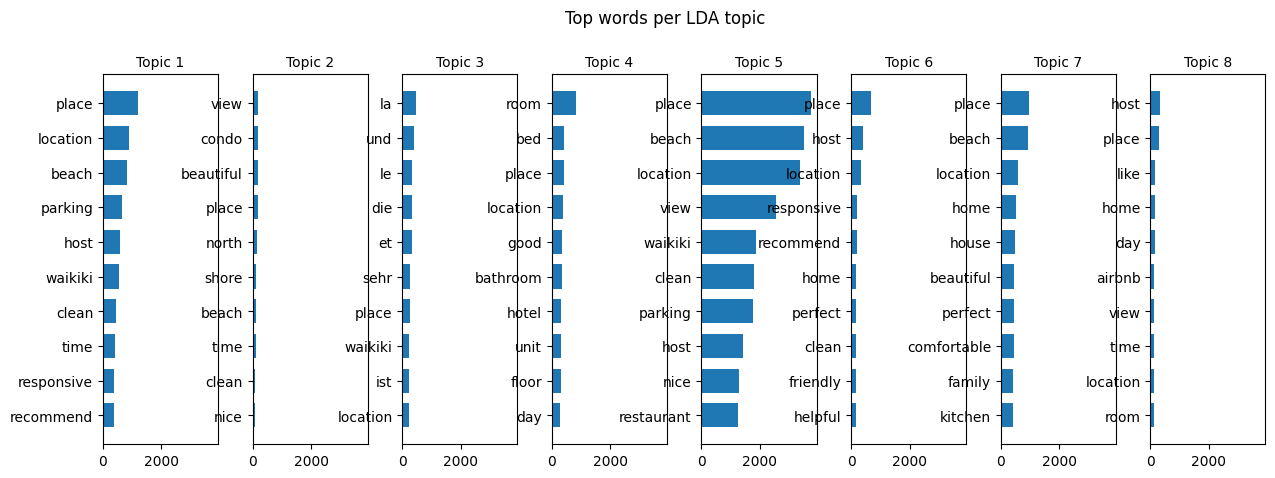

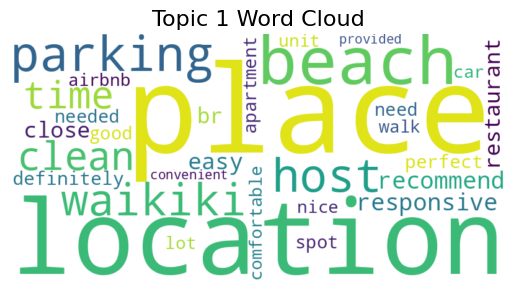

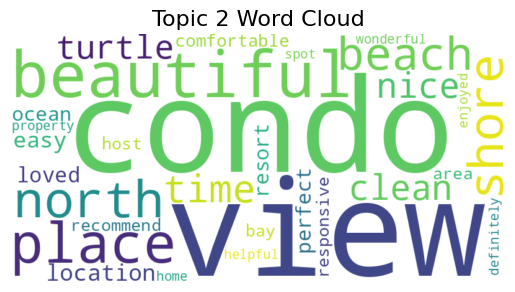

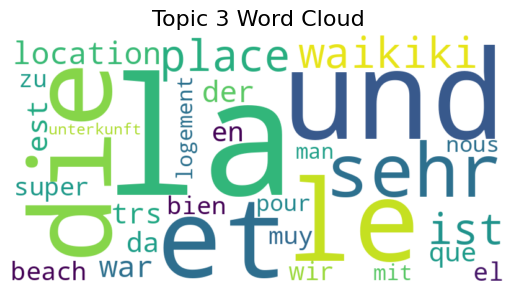

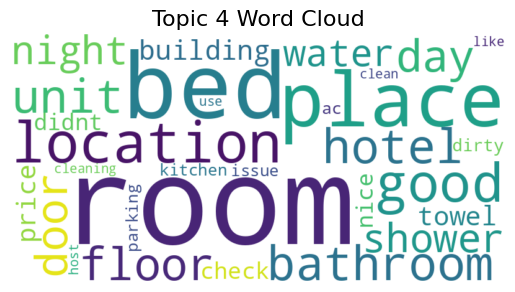

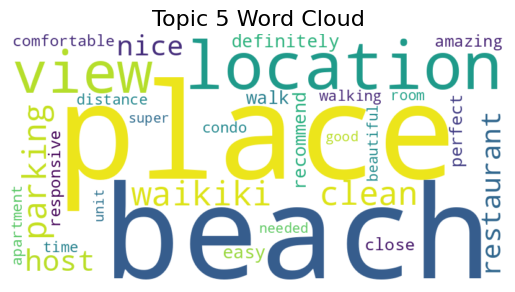

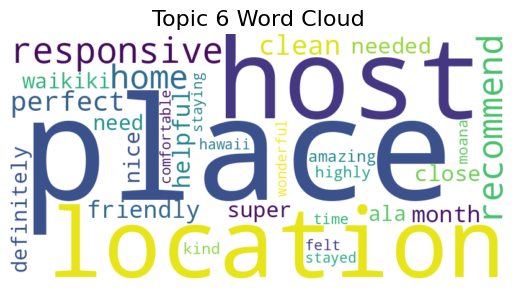

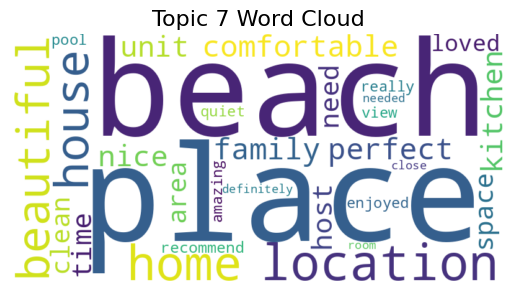

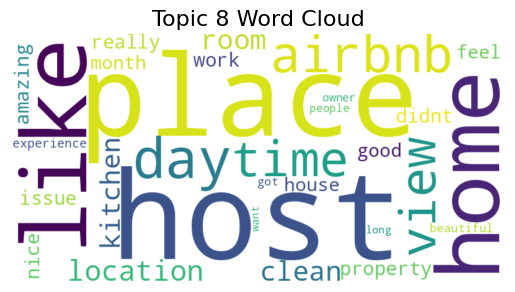

In [ ]:
# LDA topic plots
plot_top_words(lda_model, terms, n_top_words=10, title='Top words per LDA topic')
plot_word_clouds(lda_model, terms)

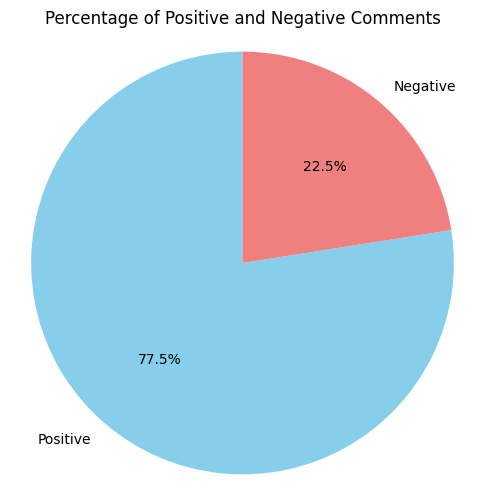

In [ ]:
# How many of these comments are possitve and how many is negative
positive_words = ["great", "excellent", "amazing", "wonderful", "fantastic", "perfect", "love", "recommend", "good", "best", "clean", "nice view", "good location", "good host"]
negative_words = ["bad", "terrible", "awful", "horrible", "poor", "disappointing", "worst", "hate", "don't recommend", "problem", "noise", "dirty", "check-in issue", "sketchy"]

positive_count = 0
negative_count = 0

# Iterate through the 'combined_reviews' column of the DataFrame
for comment in combined_df['combined_reviews']:
    for word in positive_words:
        if word in comment.lower():  # Case-insensitive matching
            positive_count += 1
            break  # Count a comment only once if a positive word is found

    for word in negative_words:
        if word in comment.lower():
            negative_count += 1
            break

import matplotlib.pyplot as plt

total_comments = positive_count + negative_count
positive_percentage = (positive_count / total_comments) * 100 if total_comments > 0 else 0
negative_percentage = (negative_count / total_comments) * 100 if total_comments > 0 else 0

# Plotting
labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Positive and Negative Comments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Zero Shot Classification

In [ ]:
!pip install transformers


In [ ]:
from transformers import pipeline
import torch

# Initialize classifier (optimized for Google Colab GPU)
classifier = pipeline(
    "zero-shot-classification",
    model="typeform/distilbert-base-uncased-mnli",  # Faster model
    device=0 if torch.cuda.is_available() else -1,
    torch_dtype=torch.float16  # Faster inference
)

# Define categories
categories = ["cleanliness", "location", "beach", "value", "amenities"]



config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/258 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Device set to use cuda:0


In [ ]:
from tqdm import tqdm

batch_results=[]
for i in tqdm(range(len(combined_df))):
  res = classifier(
      combined_df.iloc[i]['combined_reviews'],
      candidate_labels=categories,
      multi_label=True
  )
  res['listing_id'] = combined_df.iloc[i]['listing_id']
  batch_results.append(res)

100%|██████████| 3463/3463 [01:58<00:00, 29.22it/s]


In [ ]:
score_df = pd.DataFrame([
    {'listing_id': res['listing_id'], **dict(zip(res['labels'], res['scores']))}
    for res in batch_results
])

score_df.head(100)

listing_id  location     value  cleanliness     beach  amenities
0              42205873  0.816425  0.809163     0.803444  0.799960   0.794136
1              11572502  0.923592  0.837753     0.841565  0.722527   0.921216
2   1024030689175680516  0.999727  0.999320     0.999497  0.999530   0.999623
3   1167699452059332261  0.136378  0.142470     0.154058  0.132964   0.164248
4    835654868168725390  0.644225  0.493653     0.486331  0.406862   0.628407
..                  ...       ...       ...          ...       ...        ...
95  1298038953150974639  0.436862  0.275130     0.335895  0.000775   0.382141
96  1032156895527647463  0.733619  0.683842     0.683974  0.672601   0.687132
97             54351178  0.995710  0.994520     0.992181  0.994555   0.995930
98             51873932  0.584330  0.563978     0.551211  0.613700   0.587174
99             30939356  0.990597  0.991322     0.992654  0.992906   0.992207

[100 rows x 6 columns]

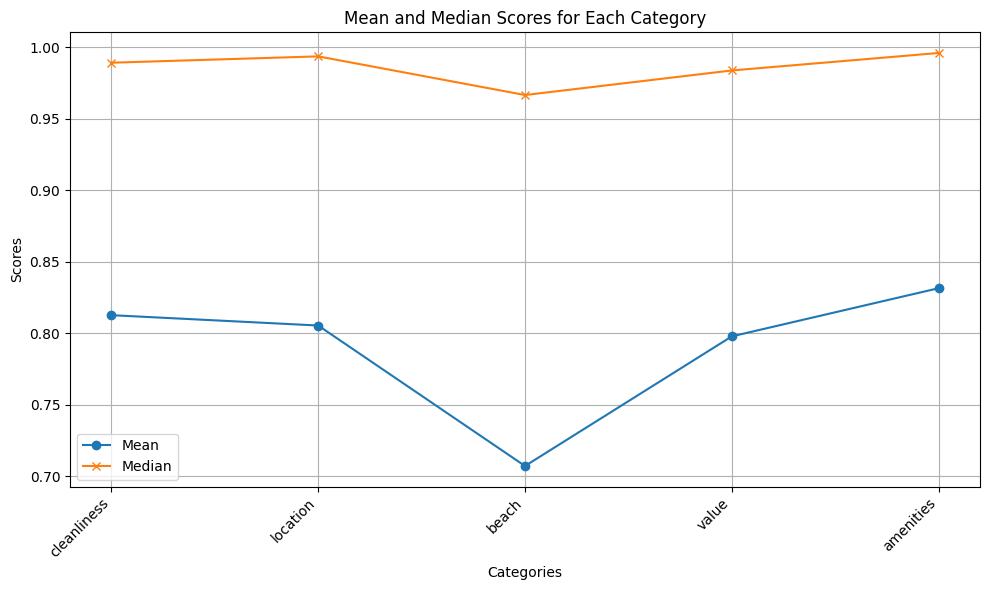

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean and median for each category
category_stats = score_df[categories].agg(['mean', 'median'])

# Transpose the DataFrame for easier plotting
category_stats = category_stats.T

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(category_stats.index, category_stats['mean'], label='Mean', marker='o')
plt.plot(category_stats.index, category_stats['median'], label='Median', marker='x')

# Customize the plot
plt.xlabel("Categories")
plt.ylabel("Scores")
plt.title("Mean and Median Scores for Each Category")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# Merge scores with combined data frame
combined_df = combined_df.merge(score_df, on='listing_id', how='left')

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3463 entries, 0 to 3462
Data columns (total 70 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   id                                                3463 non-null   int64  
 1   name                                              3463 non-null   object 
 2   host_id                                           3463 non-null   int64  
 3   price                                             3463 non-null   float64
 4   bedrooms                                          3463 non-null   float64
 5   bathrooms                                         3463 non-null   float64
 6   accommodates                                      3463 non-null   int64  
 7   number_of_reviews                                 3463 non-null   int64  
 8   review_scores_rating                              3463 non-null   float64
 9   review_scores_value

Listings with higher sentiment scores correlated with a 9.3% price premium.


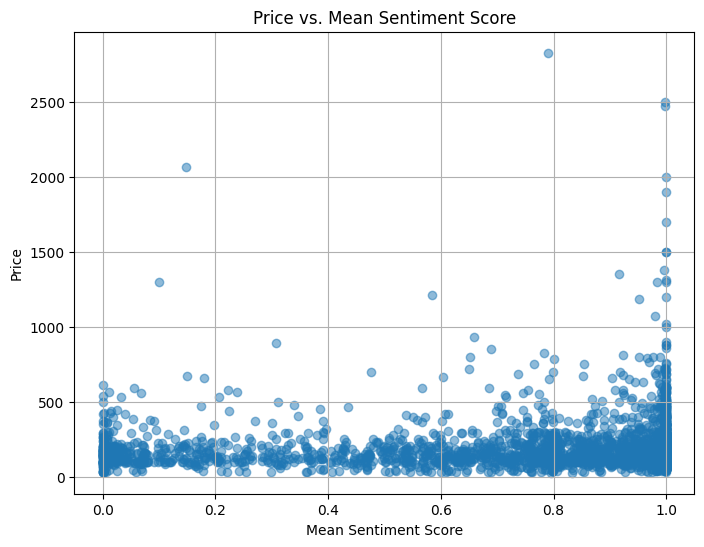

In [ ]:
# Calculate the mean sentiment score for listings
combined_df['mean_sentiment_score'] = combined_df[['cleanliness','location', 'beach', 'value', 'amenities']].mean(axis =1)

# Calculate the price premium for listings above the mean sentiment score
high_sentiment = combined_df[combined_df['mean_sentiment_score'] >= combined_df['mean_sentiment_score'].mean()]
low_sentiment = combined_df[combined_df['mean_sentiment_score'] < combined_df['mean_sentiment_score'].mean()]

mean_price_high = high_sentiment['price'].mean()
mean_price_low = low_sentiment['price'].mean()


price_premium = ((mean_price_high - mean_price_low) / mean_price_low) * 100


# Print the price premium
print(f"Listings with higher sentiment scores correlated with a {price_premium:.1f}% price premium.")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['mean_sentiment_score'], combined_df['price'], alpha=0.5)
plt.xlabel("Mean Sentiment Score")
plt.ylabel("Price")
plt.title("Price vs. Mean Sentiment Score")
plt.grid(True)
plt.show()


##5. Regression Model Building

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates the performance of a regression model on training and testing data.

    Parameters:
    - model: The regression model to evaluate.
    - X_train: Training feature data.
    - X_test: Testing feature data.
    - y_train: Training target data.
    - y_test: Testing target data.

    Returns:
    - DataFrame with performance metrics (MSE, MAE, RMSE, and R-squared) for train and test sets.
    """

    # Predictions on training data
    y_train_pred = model.predict(X_train)

    # Predictions on testing data
    y_test_pred = model.predict(X_test)

    # Calculate metrics for both train and test data
    metrics = {
        "Data": ["Train", "Test"],
        "MSE": [
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred),
        ],
        "MAE": [
            mean_absolute_error(y_train, y_train_pred),
            mean_absolute_error(y_test, y_test_pred),
        ],
        "RMSE": [
            np.sqrt(mean_squared_error(y_train, y_train_pred)),
            np.sqrt(mean_squared_error(y_test, y_test_pred)),
        ],
        "R-squared": [
            r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred),
        ],
    }

    # Create a DataFrame to display the metrics
    performance_df = pd.DataFrame(metrics)

    # Print the performance DataFrame
    return performance_df

## Linear Regression

In [ ]:
#Let's use sklearn linear_model for simplicity

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# select the target variables and features
X = combined_df[["bedrooms", "bathrooms", "accommodates"]]
y = combined_df['price']

# Split the data into training and testing sets. Let.s say 80% and 20%
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y, test_size=0.2, random_state=42)

# If you decide to normalize/scale the features to improve model performance use below code
scaler = StandardScaler()
X_train_scaled_lin = scaler.fit_transform(X_train_lin)
X_test_scaled_lin = scaler.transform(X_test_lin)




In [ ]:
# Create the linear regression model
Linreg = LinearRegression()

# Train the model
Linreg.fit(X_train_scaled_lin, y_train_lin)

# Predict on the test set
y_pred_lin = Linreg.predict(X_test_scaled_lin)

# ********Evaluate the model******

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test_lin, y_pred_lin)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculater R-squared
r_squared = Linreg.score(X_test_scaled_lin, y_test_lin)
print(f"R-squared: {r_squared}")

# Model coefficients
print("Model Coefficients (Weights):", Linreg.coef_) # weights
print("Model Intercept (Bias):", Linreg.intercept_) #bias

evaluate_regression_model(Linreg, X_train_scaled_lin, X_test_scaled_lin, y_train_lin, y_test_lin)

Root Mean Squared Error (RMSE): 136.17028988004085
R-squared: 0.017905658305132466
Model Coefficients (Weights): [ -0.09158994  53.0872923   42.56096945 -12.83694828  12.46501191]
Model Intercept (Bias): 191.62382671479943


Data           MSE        MAE        RMSE  R-squared
0  Train  29320.944294  93.517208  171.233596   0.020441
1   Test  18542.347846  88.254988  136.170290   0.017906

## KNN model

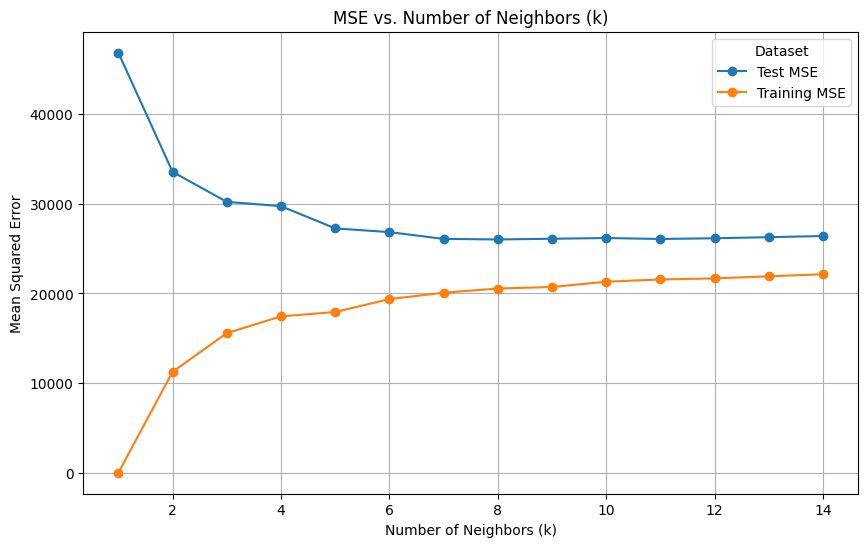

In [ ]:
knn = KNeighborsRegressor()

# Dictionary to store average training and validation MSE for each k
knn_many_split = {}

# Loop through k values
for k in range(1, 15):
    train_error = []
    test_error = []

    for i in range(30):  # Repeat splitting and training for stability
        X_train_knn,X_test_knn,y_train_knn,y_test_knn=train_test_split(X,y,test_size=0.2,random_state=1)

        scaler = StandardScaler()
        X_train_scaled_knn = scaler.fit_transform(X_train_knn)
        X_test_scaled_knn = scaler.transform(X_test_knn)

        # Initialize and train the KNN regressor
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_scaled_knn, y_train_knn)

        # Predict and calculate MSE
        y_train_pred = knn.predict(X_train_scaled_knn)
        y_pred_knn = knn.predict(X_test_scaled_knn)

        #Fixed: using scaled training predictions to compare with training targets in MSE calculation
        train_error.append(mean_squared_error(y_train_knn, y_train_pred))
        test_error.append(mean_squared_error(y_test_knn, y_pred_knn))

    # Store the average training and validation MSE for current k
    knn_many_split[k] = [sum(train_error)/len(train_error), sum(test_error)/len(test_error)]

# Prepare lists for plotting
kltrain = list(knn_many_split.keys())
vltrain = [v[0] for v in knn_many_split.values()]  # Training MSE
vltest = [v[1] for v in knn_many_split.values()]   # Validation MSE

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(kltrain, vltest, label='Test MSE', marker='o')
plt.plot(kltrain, vltrain, label='Training MSE', marker='o')
plt.title('MSE vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.legend(title='Dataset')
plt.show()

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)

#fitting data to the KNN model
knn.fit(X_train_scaled_knn, y_train_knn) # Use the scaled training data from the loop for consistency

#checking the performance of knn model
y_pred_train_knn = knn.predict(X_train_scaled_knn) # Use scaled training data for prediction
y_pred_test_knn = knn.predict(X_test_scaled_knn) # Use scaled testing data for prediction

#Evaluate metrics of knn model
mse_train_knn = mean_squared_error(y_train_knn, y_pred_train_knn) # Compare with y_train_knn
mse_test_knn = mean_squared_error(y_test_knn, y_pred_test_knn) # Compare with y_test_knn

evaluate_regression_model(knn, X_train_scaled_knn, X_test_scaled_knn, y_train_knn, y_test_knn)

Data           MSE        MAE        RMSE  R-squared
0  Train  17927.622628  74.318628  133.894072   0.355922
1   Test  27254.784762  85.724098  165.090232   0.000383

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'df' is your DataFrame containing the features (X) and target (Y)
X = combined_df.drop(['price', 'name', 'combined_reviews', 'cleaned_comments', 'id', 'listing_id', 'host_id', 'price_category'], axis=1) # Dropped price_category column

# Split data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the data
scaler = StandardScaler()
X_train_scaled_rf = scaler.fit_transform(X_train_rf) # Scale X_train and assign to X_train_scaled
X_test_scaled_rf = scaler.transform(X_test_rf) # Scale X_test and assign to X_test_scaled

# Train the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled_rf, y_train_rf) # Train the model using scaled data

# Make predictions
y_train_pred_rf = rf_model.predict(X_train_scaled_rf) # Predict using scaled data
y_test_pred_rf = rf_model.predict(X_test_scaled_rf) # Predict using scaled data

# Evaluate the model
def evaluate_model(y_true, y_pred):
    """
    Evaluates the model using various metrics.

    Args:
        y_true: The true target values.
        y_pred: The predicted target values.

    Returns:
        A tuple containing MSE, MAE, RMSE, and R2.
    """
    mse = mean_squared_error(y_true, y_pred) # Use y_pred instead of y_pred_rf
    mae = mean_absolute_error(y_true, y_pred) # Use y_pred instead of y_pred_rf
    rmse = mse**0.5
    r2 = r2_score(y_true, y_pred) # Use y_pred instead of y_pred_rf
    return mse, mae, rmse, r2


mse_train, mae_train, rmse_train, r2_train = evaluate_model(y_train_rf, y_train_pred_rf)
mse_test, mae_test, rmse_test, r2_test = evaluate_model(y_test_rf, y_test_pred_rf)

# Checking model performance
evaluate_regression_model(rf_model, X_train_scaled_rf, X_test_scaled_rf, y_train_rf, y_test_rf)

Data           MSE        MAE        RMSE  R-squared
0  Train   1638.077057  19.324769   40.473165   0.941150
1   Test  13121.052399  49.642857  114.547162   0.518763

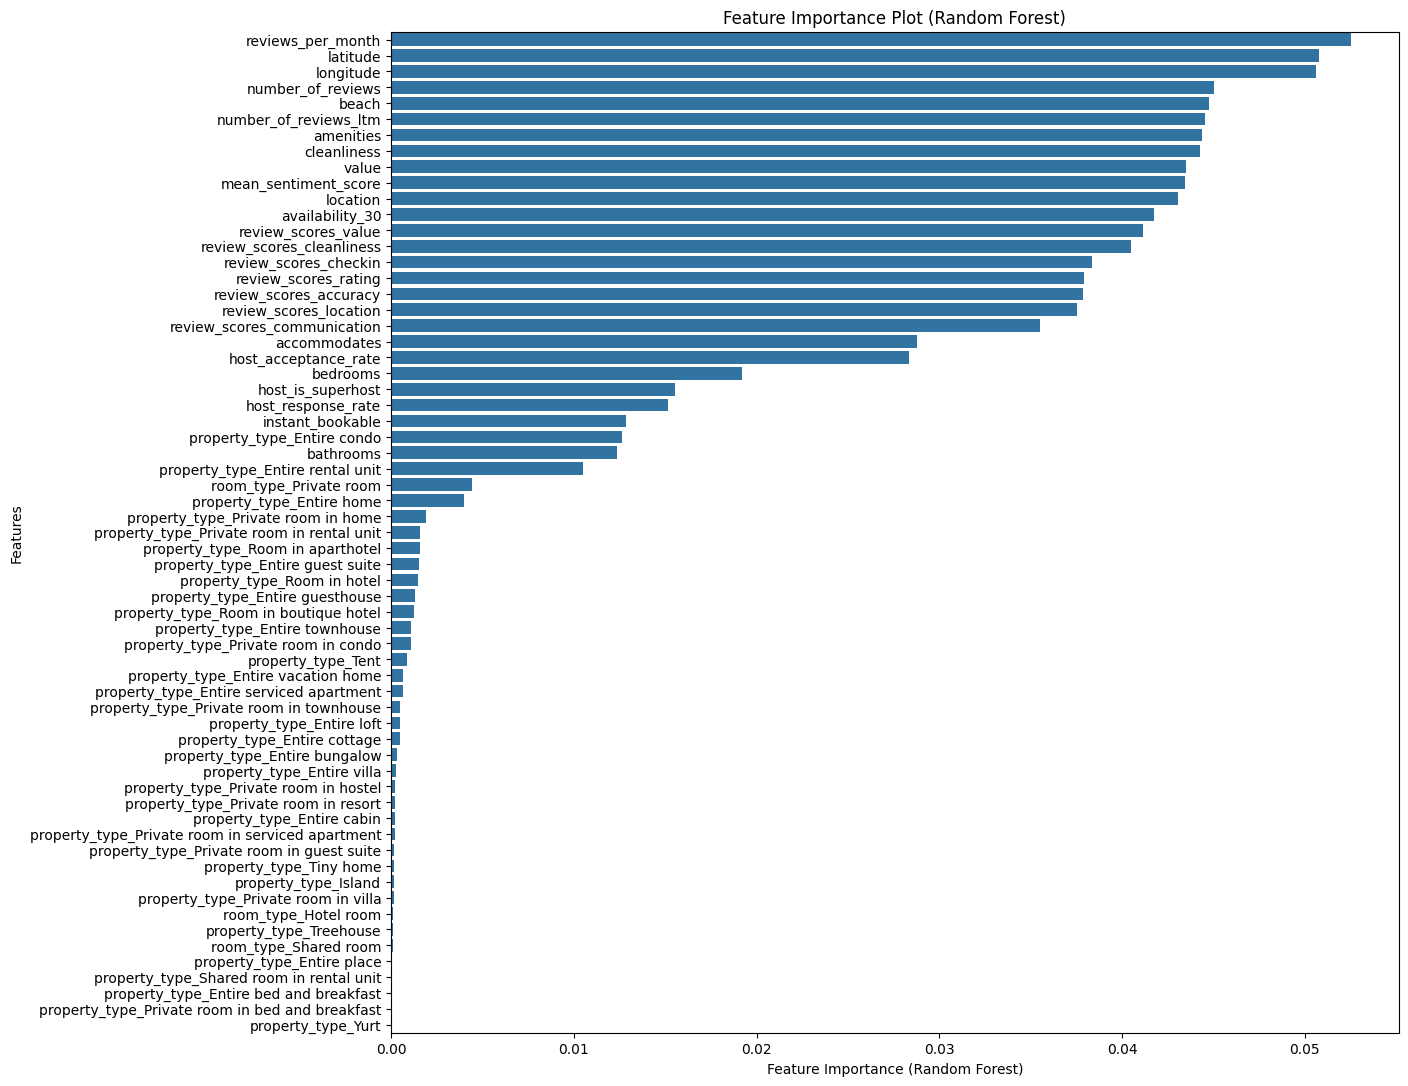

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_rf, y_train_rf)  # Use the same training data as your RandomForestRegressor

# Get feature importances from the trained model
importances = model.feature_importances_
columns = X_train_rf.columns  # Use columns from training data

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df['Importance'], y=importance_df.index)
plt.xlabel('Feature Importance (Random Forest)')
plt.ylabel('Features')
plt.title('Feature Importance Plot (Random Forest)')
plt.show()

In [ ]:
importance_df

Importance
reviews_per_month                                  0.052498
latitude                                           0.050749
longitude                                          0.050594
number_of_reviews                                  0.045035
beach                                              0.044746
...                                                     ...
property_type_Entire place                         0.000072
property_type_Shared room in rental unit           0.000049
property_type_Entire bed and breakfast             0.000000
property_type_Private room in bed and breakfast    0.000000
property_type_Yurt                                 0.000000

[63 rows x 1 columns]

In [ ]:
# Analyze listings with instant_bookable status and higher number_of_reviews_ltm
instant_bookable_listings = combined_df[combined_df['instant_bookable'] == 1]
high_reviews_listings = instant_bookable_listings[instant_bookable_listings['number_of_reviews_ltm'] > instant_bookable_listings['number_of_reviews_ltm'].mean()]


low_availability_listings = combined_df[(combined_df['instant_bookable'] == 1) & (combined_df['number_of_reviews_ltm'] > combined_df['number_of_reviews_ltm'].mean())]

avg_availability_all = combined_df['availability_30'].mean()
avg_availability_specific = low_availability_listings['availability_30'].mean()
percentage_diff = ((avg_availability_all - avg_availability_specific) / avg_availability_all)*100
print(f"Listings with instant_bookable status and higher reviews have {percentage_diff:.1f}% lower availability")

Listings with instant_bookable status and higher reviews have 12.6% lower availability


# Model Comparison

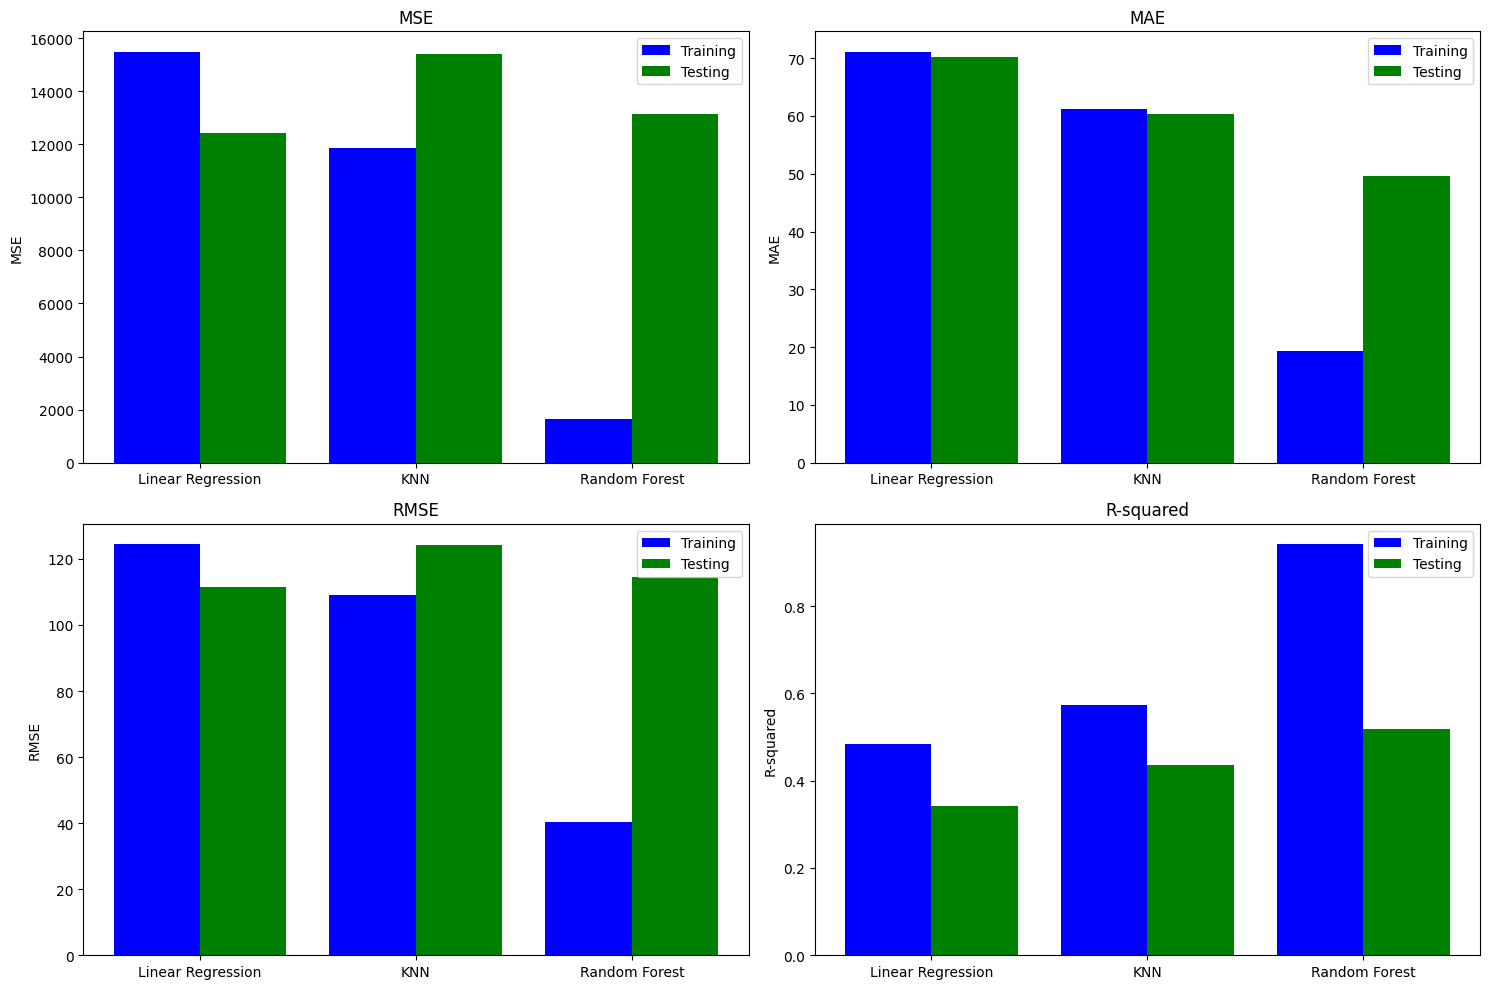

In [ ]:
import matplotlib.pyplot as plt

def plot_regression_metrics(models, model_names, train_data, test_data):
    metrics = ['MSE', 'MAE', 'RMSE', 'R-squared']
    num_models = len(models)
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        x_pos = range(num_models)
        width = 0.4
        axes[i].bar([p - width/2 for p in x_pos], [model_results.loc[0, metric] for model_results in train_data], width, label="Training", color='blue')
        axes[i].bar([p + width/2 for p in x_pos], [model_results.loc[1, metric] for model_results in test_data], width, label="Testing", color='green')

        axes[i].set_ylabel(metric)
        axes[i].set_title(metric)
        axes[i].set_xticks(x_pos)
        axes[i].set_xticklabels(model_names)
        axes[i].legend()

    plt.tight_layout()
    plt.show()

# Example usage with your models
linreg_results_train = evaluate_regression_model(Linreg, X_train_scaled_lin, X_test_scaled_lin, y_train_lin, y_test_lin)
knn_results_train = evaluate_regression_model(knn, X_train_scaled_knn, X_test_scaled_knn, y_train_knn, y_test_knn)
rf_results_train = evaluate_regression_model(rf_model, X_train_scaled_rf, X_test_scaled_rf, y_train_rf, y_test_rf)


plot_regression_metrics([Linreg, knn, rf_model], ['Linear Regression', 'KNN', 'Random Forest'],
                        [linreg_results_train, knn_results_train, rf_results_train],
                        [linreg_results_train, knn_results_train, rf_results_train])


Random Forest outperforms across all metrics